In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [8]:
df['Classes'] = df['Classes'].str.strip().map({'fire': 1, 'not fire': 0})


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
## Independent feature and dependent feature 
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [32]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [33]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.25, 
                                                    random_state=79)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((182, 11), (61, 11), (182,), (61,))

In [101]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
78,36,54,18,0.0,89.4,20.0,110.9,9.7,27.5,1,0
25,31,64,18,0.0,86.8,17.8,71.8,6.7,21.6,1,0
139,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0,1
195,37,40,13,0.0,91.9,22.3,55.5,10.8,22.3,1,1
187,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0,1


In [102]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.705532,-0.303587,-0.368652,0.702978,0.505275,0.395714,0.628949,0.478689,0.549640,0.297213
RH,-0.705532,1.000000,0.200743,0.246255,-0.664000,-0.407577,-0.208959,-0.697752,-0.345364,-0.433384,-0.433816
Ws,-0.303587,0.200743,1.000000,0.239538,-0.123340,0.064046,0.121647,0.047378,0.092810,-0.021367,-0.173383
Rain,-0.368652,0.246255,0.239538,1.000000,-0.560166,-0.295277,-0.296733,-0.345031,-0.304036,-0.375524,-0.102084
FFMC,0.702978,-0.664000,-0.123340,-0.560166,1.000000,0.608719,0.495896,0.730869,0.591837,0.769118,0.301428
DMC,0.505275,-0.407577,0.064046,-0.295277,0.608719,1.000000,0.875045,0.670607,0.981780,0.579760,0.212008
DC,0.395714,-0.208959,0.121647,-0.296733,0.495896,0.875045,1.000000,0.463573,0.939364,0.494636,-0.055206
ISI,0.628949,-0.697752,0.047378,-0.345031,0.730869,0.670607,0.463573,1.000000,0.622219,0.722947,0.312475
BUI,0.478689,-0.345364,0.092810,-0.304036,0.591837,0.981780,0.939364,0.622219,1.000000,0.579758,0.110064
Classes,0.549640,-0.433384,-0.021367,-0.375524,0.769118,0.579760,0.494636,0.722947,0.579758,1.000000,0.196640


<Axes: >

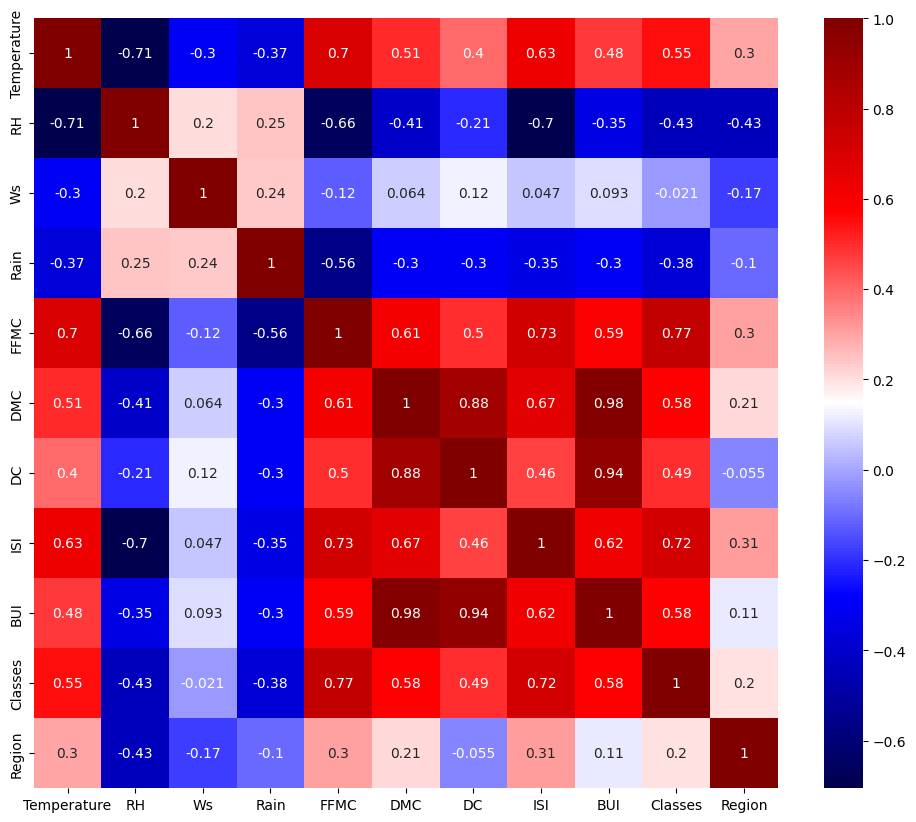

In [103]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, cmap='seismic', annot=True)

In [104]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [105]:
corr_features = correlation(X_train, 0.85)

In [106]:
corr_features

{'BUI', 'DC'}

In [107]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [108]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler  = StandardScaler()

In [111]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)


Mean Absolute Error 0.7807816944147378
Mean Squared Error 1.2240962000777416
Root Mean Squared Error 1.1063888105353115
R2 score 0.9791068508465157


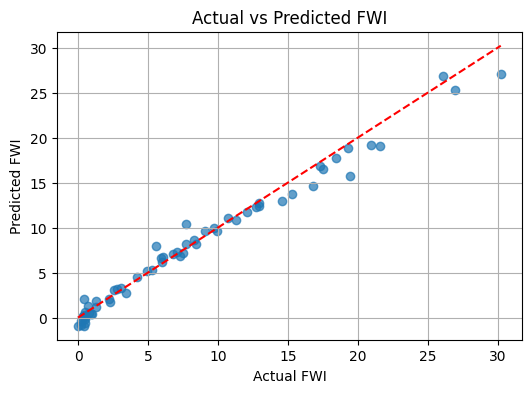

In [113]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distribution of Residuals')

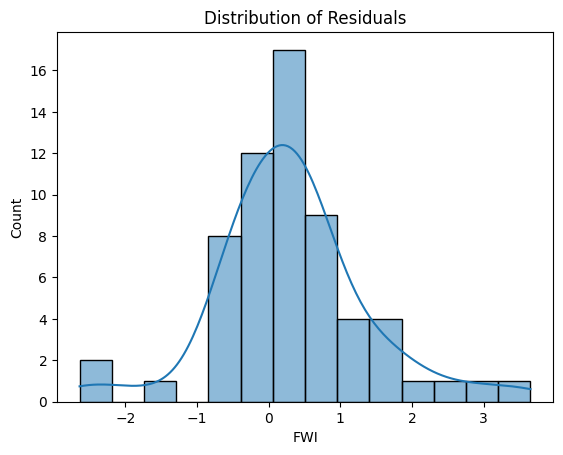

In [114]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")


## Lasso Regression

In [115]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 1.4587090467515942
Mean Squared Error 4.007154276559071
Root Mean Squared Error 2.0017877701092766
R2 score 0.9316049898889859


In [116]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred=lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 0.7650417389395652
Mean Squared Error 1.2310725150947315
Root Mean Squared Error 1.1095370724291873
R2 score 0.9789877775333379


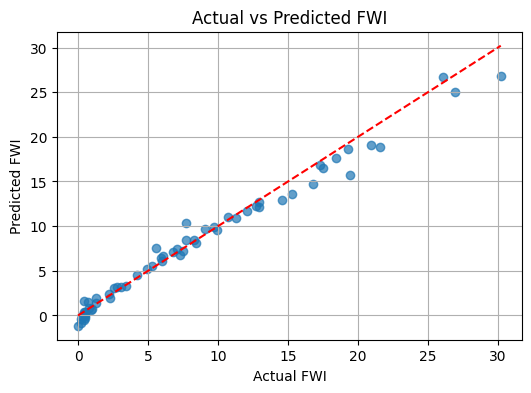

In [117]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distribution of Residuals')

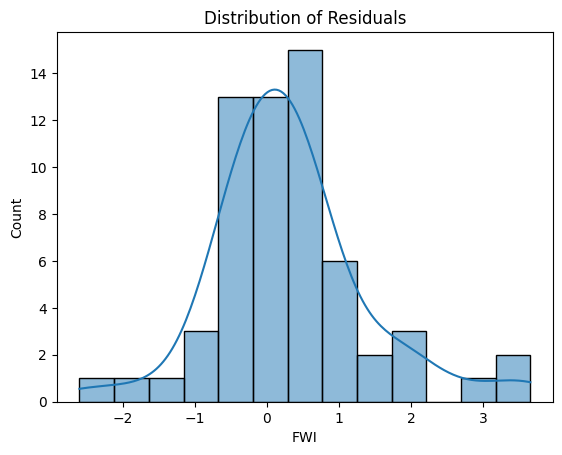

In [118]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")


## Ridge Regression

In [119]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 0.7931263726637908
Mean Squared Error 1.267888967440727
Root Mean Squared Error 1.1260057581738767
R2 score 0.9783593860473434


In [120]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 0.7931263726636933
Mean Squared Error 1.2678889674421165
Root Mean Squared Error 1.1260057581744938
R2 score 0.9783593860473196


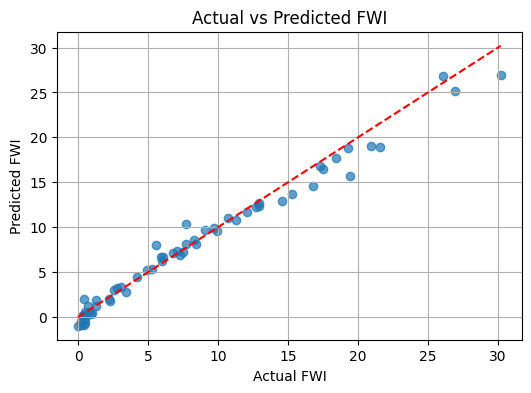

In [121]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

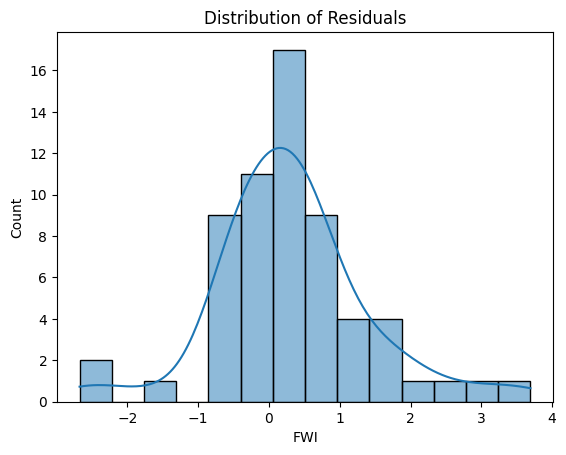

In [122]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")


## Elastic Net

In [123]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred=elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 2.0378850270223685
Mean Squared Error 8.069524607530138
Root Mean Squared Error 2.8406908679985117
R2 score 0.8622675397471773


In [124]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled, y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 score", score)

Mean Absolute Error 0.7983134350795804
Mean Squared Error 1.310770544076175
Root Mean Squared Error 1.144888878483923
R2 score 0.9776274736563695


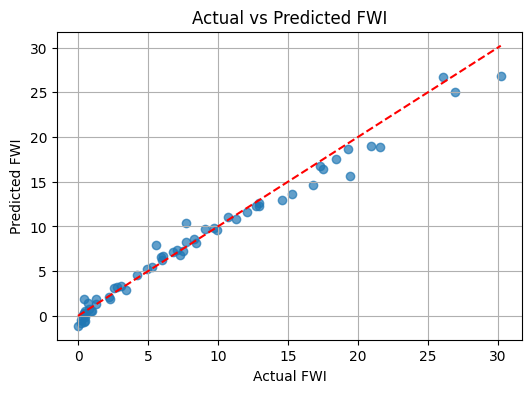

In [125]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

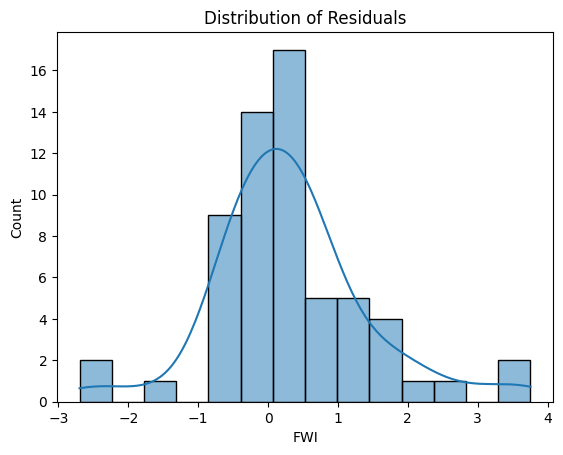

In [126]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Fit on original (unscaled) X
pipe.fit(X_train, y_train)

# Save the whole pipeline
with open('lr_pipeline.pkl', 'wb') as f:
    pickle.dump(pipe, f)

# Load later
# with open('lr_pipeline.pkl', 'rb') as f:
#     loaded_pipe = pickle.load(f)
#     preds = loaded_pipe.predict(X_new)
